# DATA DESCRIPTION

This dataset includes details of Temperature Forecast i.e summer data from 2013 to 2017.Following are the independent and dependent variables present in then Dataset:

Independent Variable:
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

Target Variable:
1. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
2. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

PROBLEM STATEMENT :

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.



So, from the problem statement and the Dataset we can understand that it is a "Regression problem". so we will be using some Regression algorithms to make our model and then use GRIDSEARCHCV for hypeparameter tuning and save the predicted model using pkl.

# Importing the needed Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

DATA PREPARATION/Loading the Data

In [2]:
#Lpading the training set
df = pd.read_csv("temp.csv")


# EDA

In [4]:
#Lets see the dimension of the training set
df.shape

(7752, 25)

From the above we can see that there are 7752 rows and 25 colums

In [5]:
df.columns 

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

We have 23 independent variables and 2 target variable, i.e. price in the training dataset.

In [8]:
# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [10]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [11]:
#Lets check for null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

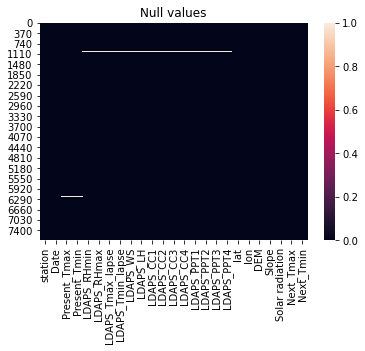

In [13]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

From the heatmap we can see that we have very few null values in the dataset.

In [14]:
#Dropping Missing Values
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

As we can see that all the null values has been dropped as there were very few in the datset.

In [17]:
#Lets get some general info about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


So from the above we can see that there are two datatypes present in the dataset i.e float and obj. Here the date is object we will change that to int.

In [41]:
#Lets get a general idea about the dataset
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,0.355528,0.317546,0.298268,0.589008,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,15.939510,7.465999
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,0.257922,0.249833,0.253392,1.927577,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,8.906521,0.528635
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,1.000000,6.000000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,0.140324,0.100950,0.081495,0.000000,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,8.000000,7.000000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,0.311676,0.261795,0.227459,0.000000,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,16.000000,7.000000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,0.557164,0.496444,0.498127,0.052594,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,24.000000,8.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,31.000000,8.000000


# Data Cleaning

In [18]:
# Checking if there are any Duplicate values
df[df.duplicated()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin


In [19]:
# Drop duplicates value
df.drop_duplicates(keep='first',inplace=True)

In the segment 'Date_of_Journey', we can see the date design is given as dd/mm/yyyy and as you can see the data type is given as an object So there are two different ways to handle this section, either convert the segment into Timestamp or separation the segment into the date, Month, Year. Here, I'm parting the columns

In [26]:
df["day"] = df['Date'].str.split('-').str[0].astype(int)
df["month"] = df['Date'].str.split('-').str[1].astype(int)

df.drop('Date', inplace=True, axis=1)



In [27]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6


# Now lets do some variate Analysis

Text(0.5, 1.0, 'T_max')

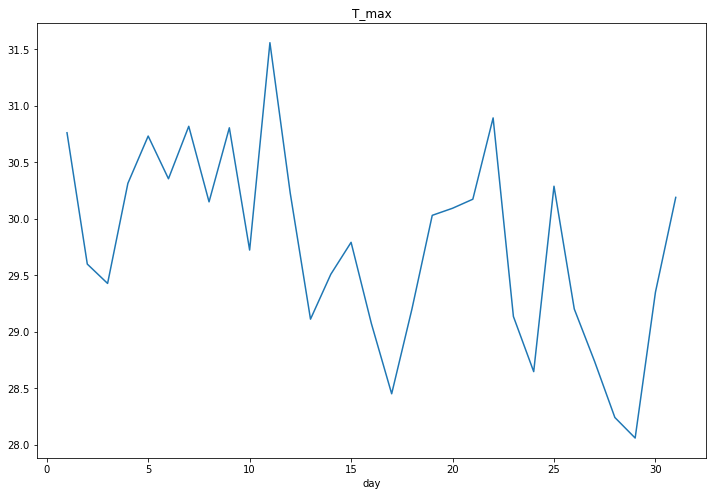

In [32]:
byDate=df.groupby('day').mean()
plt.figure(figsize=(12,8))
byDate['Present_Tmax'].plot()
plt.title('T_max')

Text(0.5, 1.0, 'T_min')

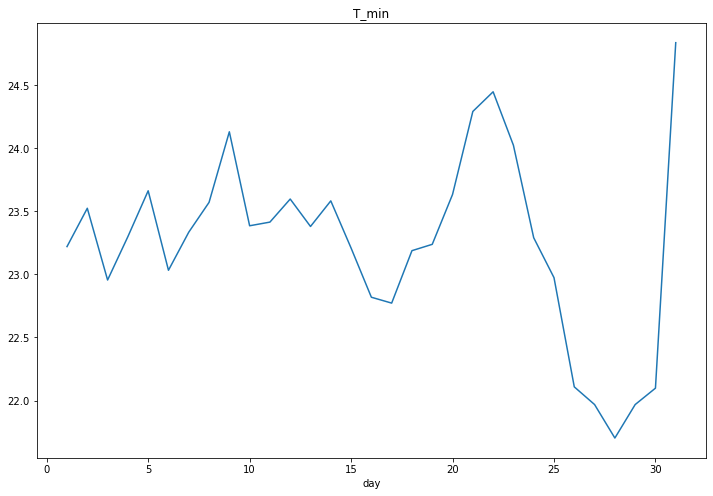

In [33]:
byDate=df.groupby('day').mean()
plt.figure(figsize=(12,8))
byDate['Present_Tmin'].plot()
plt.title('T_min')

Text(0.5, 1.0, 'NextTmax')

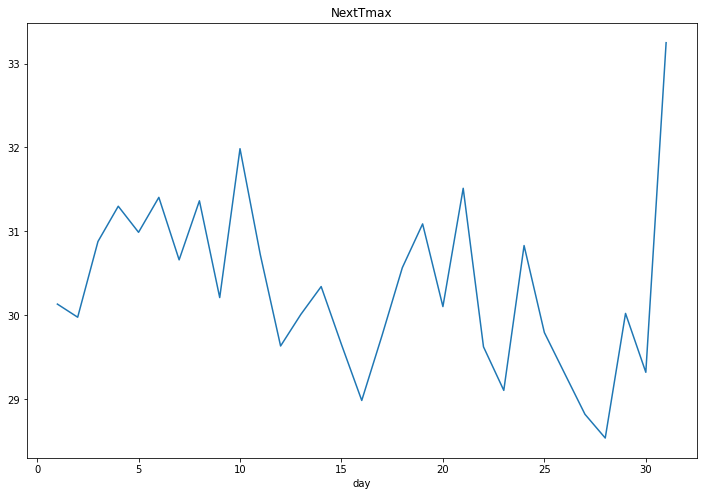

In [34]:
byDate=df.groupby('day').mean()
plt.figure(figsize=(12,8))
byDate['Next_Tmax'].plot()
plt.title('NextTmax')

Text(0.5, 1.0, 'NextTmin')

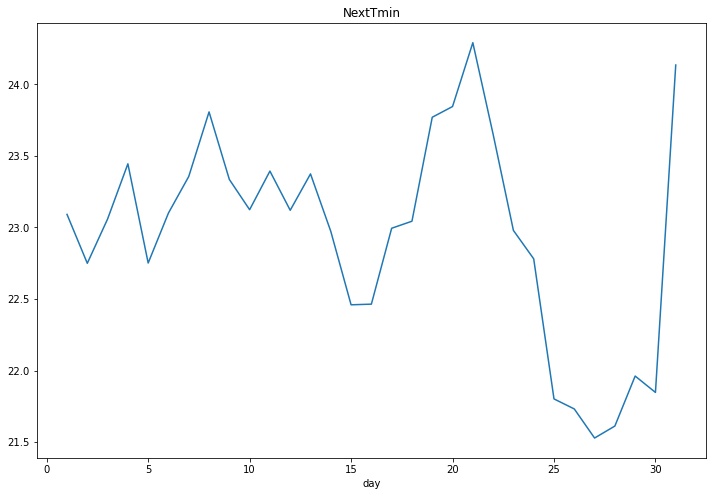

In [35]:
byDate=df.groupby('day').mean()
plt.figure(figsize=(12,8))
byDate['Next_Tmin'].plot()
plt.title('NextTmin')

<AxesSubplot:xlabel='Next_Tmin'>

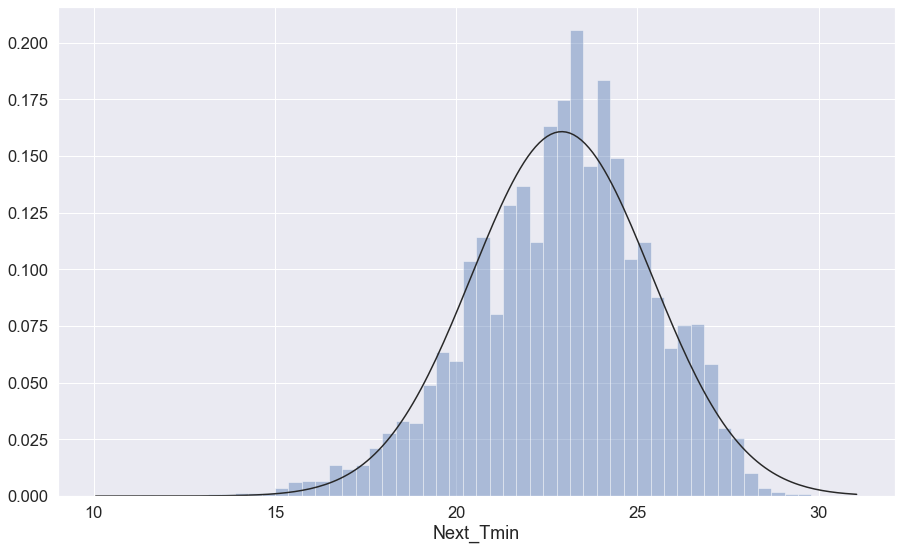

In [36]:
#In which range Average price lies and what is the distribution looks like

sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.Next_Tmin, kde=False, fit=norm)

<AxesSubplot:xlabel='Next_Tmax'>

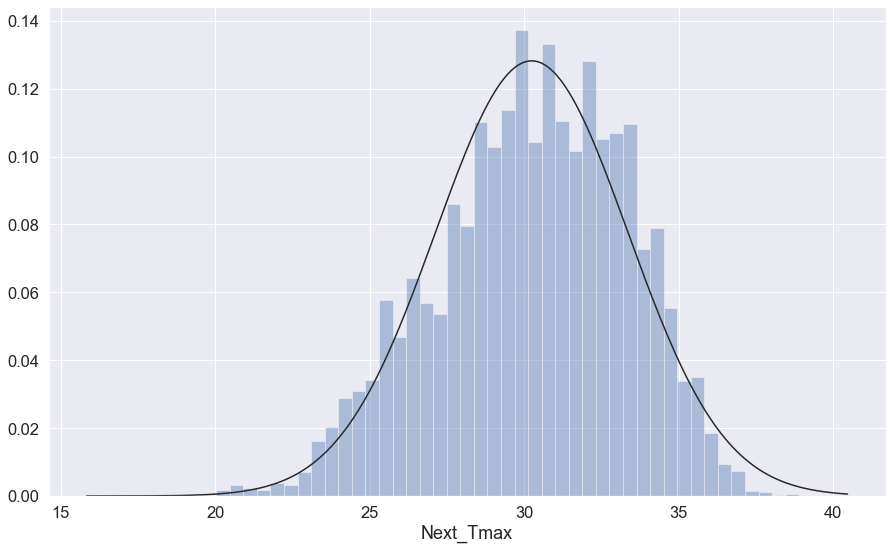

In [37]:
#In which range Average price lies and what is the distribution looks like

sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.Next_Tmax, kde=False, fit=norm)

<AxesSubplot:xlabel='Present_Tmax'>

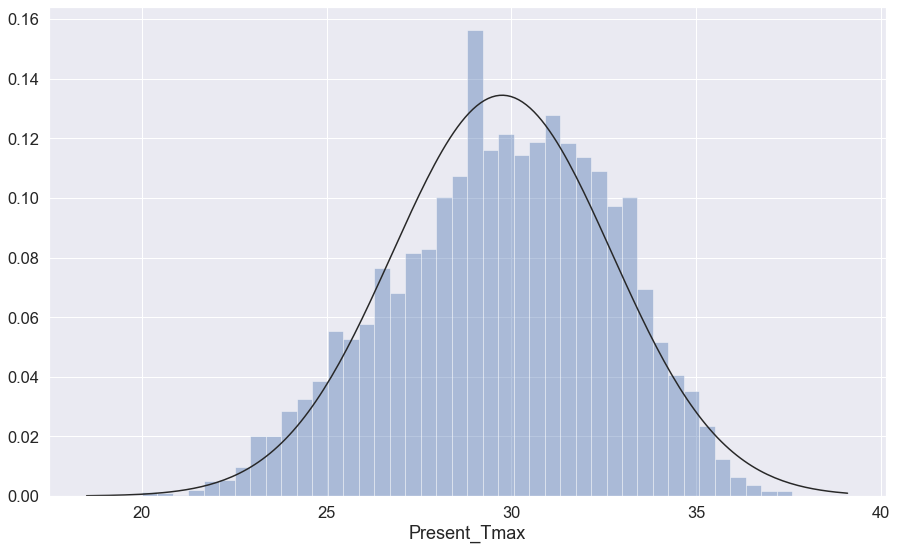

In [38]:
#In which range Average price lies and what is the distribution looks like

sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.Present_Tmax, kde=False, fit=norm)

<AxesSubplot:xlabel='Present_Tmin'>

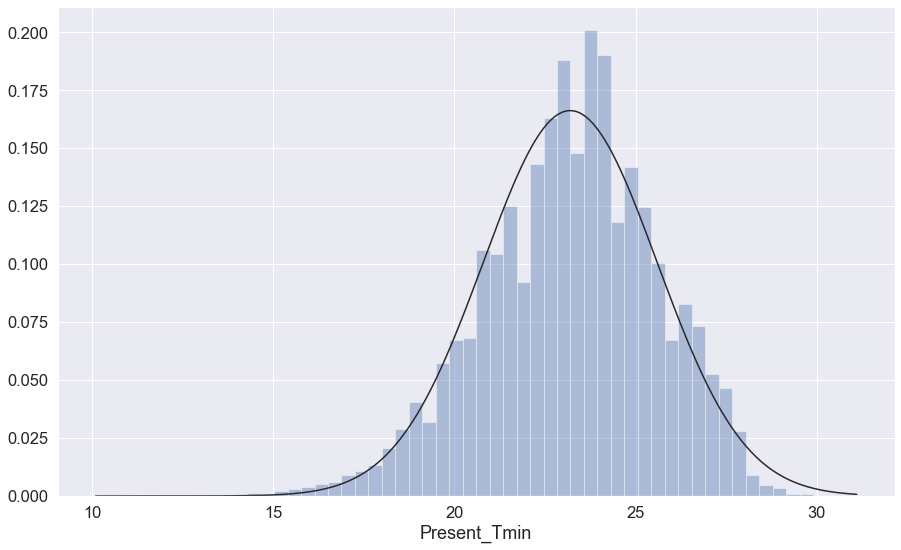

In [39]:
#In which range Average price lies and what is the distribution looks like

sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.Present_Tmin, kde=False, fit=norm)

<function matplotlib.pyplot.show(close=None, block=None)>

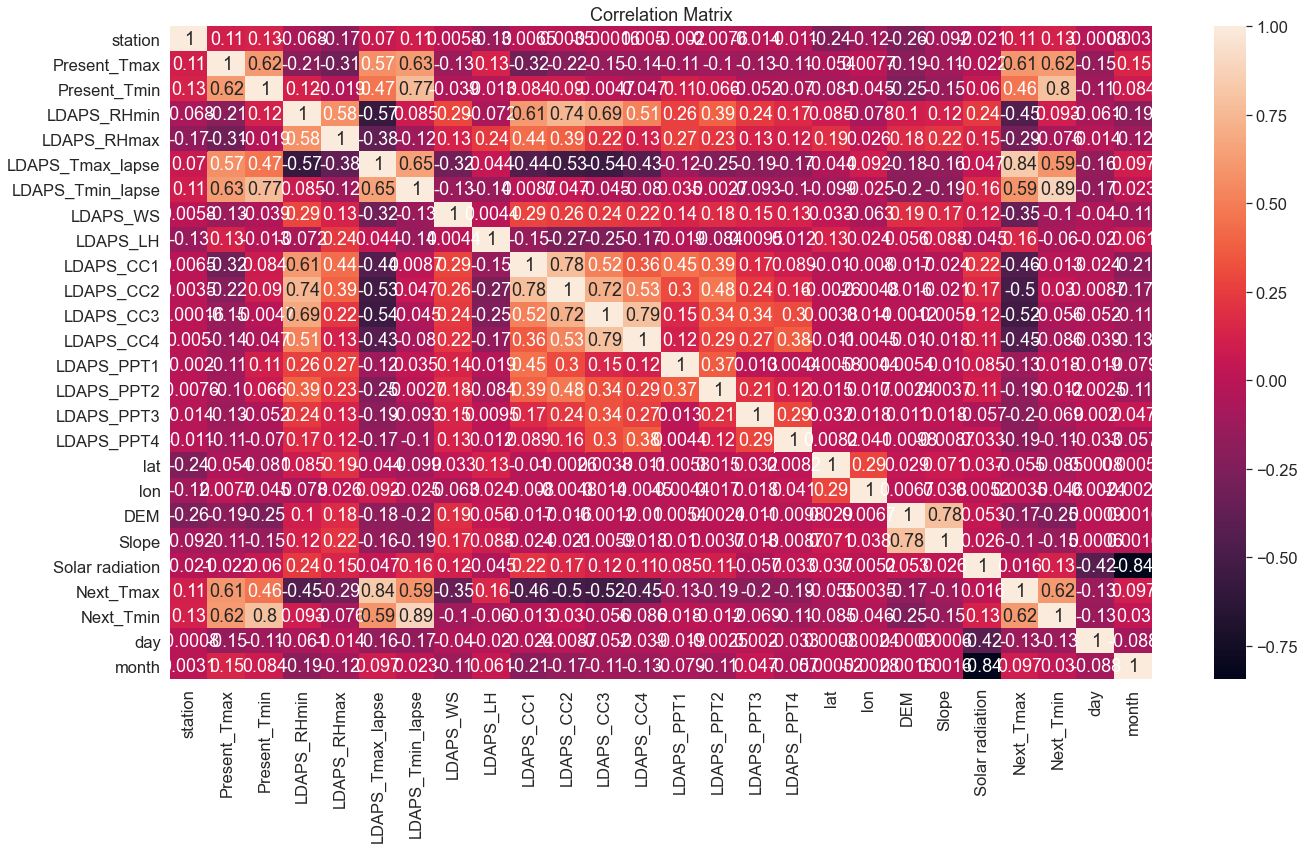

In [40]:
#Doing multivariate analysis to find some correlation in the dataset

plt.figure(figsize=[22,12])
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show

From the correlation above we can see some kind of relations in between some of the feature variables like Next_Tmax,lat,lon,LDAPS_CC1 etc

# Splitting the Dataset where Next_Tmax is the target variable

In [47]:
x=df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y=df['Next_Tmax']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from sklearn.metrics import r2_score

for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state=i)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test= LR.predict(x_test)
    print(f'at random state {i}, the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'at random state {i}, the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('\n')

at random state 1, the training accuracy is: 0.7837552882926908
at random state 1, the testing accuracy is: 0.78451167869877


at random state 2, the training accuracy is: 0.7859052012741718
at random state 2, the testing accuracy is: 0.7791784257830101


at random state 3, the training accuracy is: 0.7833635266442375
at random state 3, the testing accuracy is: 0.7851576627289876


at random state 4, the training accuracy is: 0.7901403854941661
at random state 4, the testing accuracy is: 0.7685186005920073


at random state 5, the training accuracy is: 0.7807351459634908
at random state 5, the testing accuracy is: 0.7921564024585666


at random state 6, the training accuracy is: 0.7848470683794686
at random state 6, the testing accuracy is: 0.78179004414944


at random state 7, the training accuracy is: 0.7812528477537347
at random state 7, the testing accuracy is: 0.7902221859592564


at random state 8, the training accuracy is: 0.7871016140885522
at random state 8, the testing accura

at random state 75, the testing accuracy is: 0.7872655715104016


at random state 76, the training accuracy is: 0.7842674883290215
at random state 76, the testing accuracy is: 0.7832013097941077


at random state 77, the training accuracy is: 0.791114064761543
at random state 77, the testing accuracy is: 0.7656156115231392


at random state 78, the training accuracy is: 0.7889867456157943
at random state 78, the testing accuracy is: 0.7709864847240242


at random state 79, the training accuracy is: 0.7810675276364191
at random state 79, the testing accuracy is: 0.7899989670003595


at random state 80, the training accuracy is: 0.7846990100890489
at random state 80, the testing accuracy is: 0.7818398802743116


at random state 81, the training accuracy is: 0.780985386210565
at random state 81, the testing accuracy is: 0.7905824514992107


at random state 82, the training accuracy is: 0.783565454778394
at random state 82, the testing accuracy is: 0.784915405471537


at random state 83, t

# Linear Regression

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=79)

In [52]:
#Creating & Training the Model

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [53]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.080817403839773
MSE: 2.014063175591775
RMSE: 1.419176935970908


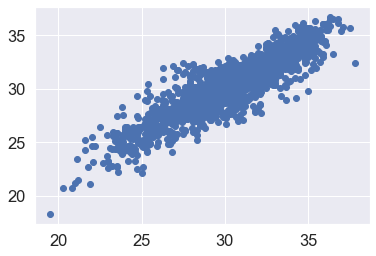

In [54]:
#Lets plot the y_test vs the predictions
plt.scatter(x=y_test,y=pred)

,Y Test,Pred
3304,30.5,27.643552
1479,27.3,28.706434
74,31.0,30.865307
5460,30.5,28.101417
5349,31.8,31.062074


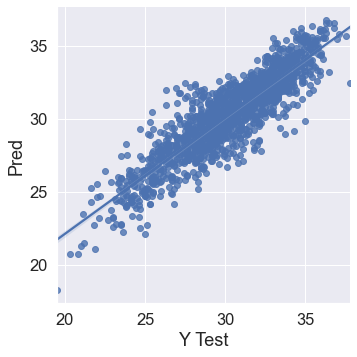

In [55]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Using Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [57]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.6910309617918309
MSE: 0.8523145843214752
RMSE: 0.9232088519514289


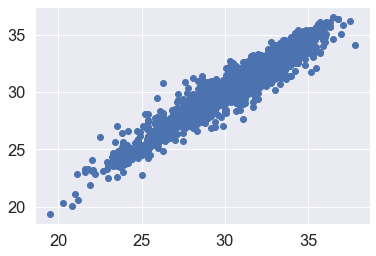

In [58]:
#Lets plot the y_test vs the predictions
plt.scatter(x=y_test,y=pred)

,Y Test,Pred
3304,30.5,29.634
1479,27.3,27.672
74,31.0,31.039
5460,30.5,30.178
5349,31.8,31.261


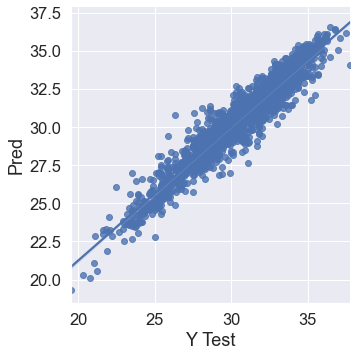

In [59]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Decision Tree Regression

In [60]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.0235836627140975
MSE: 2.0006851119894593
RMSE: 1.4144557652996643


Text(0, 0.5, 'Predicted Y')

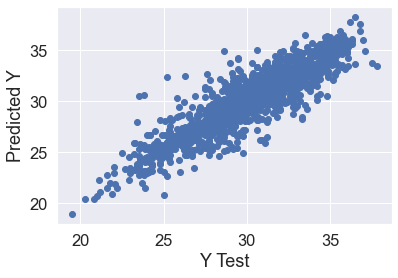

In [62]:
#Lets plot the y_test vs the predictions
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

,Y Test,Pred
3304,30.5,29.5
1479,27.3,27.1
74,31.0,31.6
5460,30.5,30.5
5349,31.8,29.1


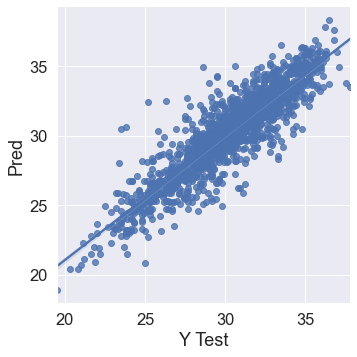

In [65]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

Lets Check the Cross Validation Score

In [67]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LinearRegression(),x,y, cv=5)
print('Cross validation score of LinearRegression model :',scr.mean())

Cross validation score of LinearRegression model : 0.7159175788379165


In [68]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score( RandomForestRegressor(),x,y, cv=5)
print('Cross validation score of  RandomForestRegressor model :',scr.mean())

Cross validation score of  RandomForestRegressor model : 0.6968175920165282


In [69]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score( DecisionTreeRegressor(),x,y, cv=5)
print('Cross validation score of  DecisionTreeRegressor model :',scr.mean())

Cross validation score of  DecisionTreeRegressor model : 0.45350888509150433


# Splitting the Dataset where Next_Tmin is the target variable

In [70]:
x=df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y=df['Next_Tmin']

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=79)

Linear Regression

In [72]:
#Creating & Training the Model

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [73]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.7958168670986439
MSE: 1.050254988447262
RMSE: 1.0248194906651913


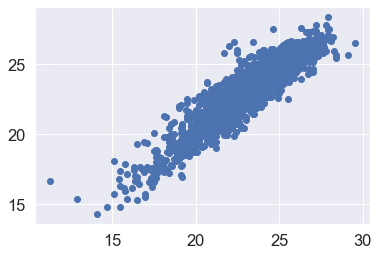

In [74]:
#Lets plot the y_test vs the predictions
plt.scatter(x=y_test,y=pred)

,Y Test,Pred
3304,21.6,20.290914
1479,23.6,22.574725
74,20.7,21.340129
5460,24.4,23.737162
5349,26.8,25.142623


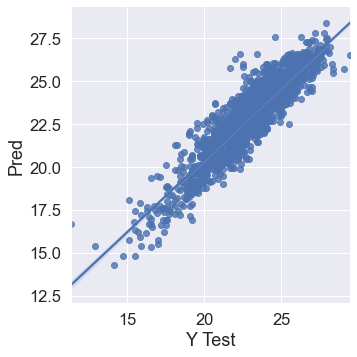

In [75]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Random Forest Regressor

In [77]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [78]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.5880223978919632
MSE: 0.601184476943347
RMSE: 0.7753608688496905


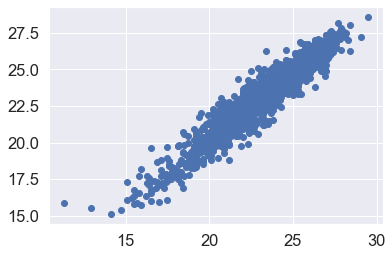

In [79]:
#Lets plot the y_test vs the predictions
plt.scatter(x=y_test,y=pred)

,Y Test,Pred
3304,21.6,20.449
1479,23.6,22.751
74,20.7,20.944
5460,24.4,23.469
5349,26.8,24.927


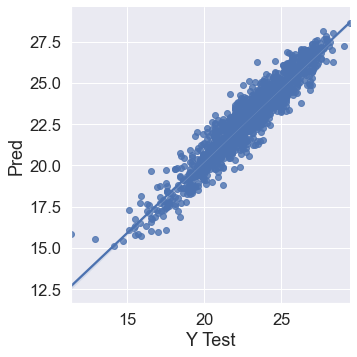

In [80]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Decision Tree Regression

In [81]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [82]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.8291172595520421
MSE: 1.2480632411067196
RMSE: 1.1171675080786765


Text(0, 0.5, 'Predicted Y')

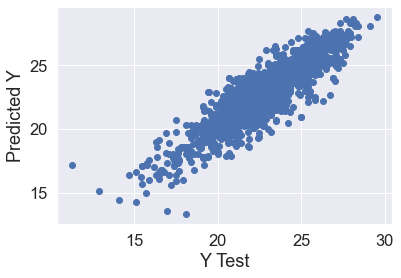

In [83]:
#Lets plot the y_test vs the predictions
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

,Y Test,Pred
3304,21.6,20.2
1479,23.6,24.3
74,20.7,21.8
5460,24.4,23.9
5349,26.8,26.4


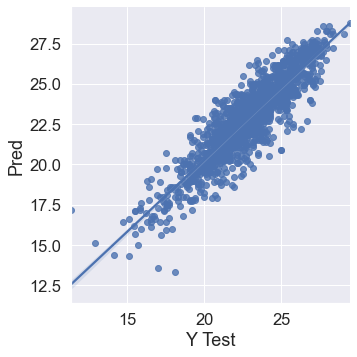

In [84]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Lets Check the Cross Validation Score for Next_Tmin

In [86]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LinearRegression(),x,y, cv=5)
print('Cross validation score of LinearRegression model :',scr.mean())

Cross validation score of LinearRegression model : 0.7834760010202038


In [88]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score( RandomForestRegressor(),x,y, cv=5)
print('Cross validation score of  RandomForestRegressor model :',scr.mean())

Cross validation score of  RandomForestRegressor model : 0.7807141261208923


In [89]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score( DecisionTreeRegressor(),x,y, cv=5)
print('Cross validation score of  DecisionTreeRegressor model :',scr.mean())

Cross validation score of  DecisionTreeRegressor model : 0.5664335560939935


So from the above we can see that RandomForestRegressor gives us the best model for both the Target Variables ie Next_Tmax and Next_Tmin

# GRIDSEARCH CV

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
#creating parameters list to pass in GridSearchCv

parameters = {'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}

In [97]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [101]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [102]:
GCV.best_params_

{'criterion': 'mse', 'max_features': 'log2'}

In [103]:
GCV_pred=GCV.best_estimator_.predict(X_test)

# Saving the best model using pkl.

In [104]:
import joblib
filename = 'temp_forecast.pkl'
joblib.dump(GCV.best_estimator_, filename)

['temp_forecast.pkl']